# Project Part B: Representation

![](banner_project.jpg)

In [1]:
analyst = "Citlalli Villarreal" # Replace this with your name

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
options(repr.matrix.max.cols=200)
update_geom_defaults("point", list(size=1))                                

.................................................... start of document ....................................................

## Directions

### Objective

Transform the representation of a dataset about public company fundamentals.  Later, use the transformed dataset along with additional analysis to recommend a portfolio of 12 company investments that maximizes 12-month return of an overall \$1,000,000 investment.

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.

Transform the dataset representation to capture all information about any single company in a single observation.

Additionally transform the dataset representation using variable filtration, imputation, principal component analysis, and other methods.

## Data

The original data is stored as a CSV. The use of "read.csv" allows for the original data, stored as a CSV, to become transformed into a data frame (data table).

In [3]:
# Retrieve "My Primary Data.csv"
data = read.csv("My Primary Data.csv", header=TRUE)

# Present a few rows ...
data[1:2,]

gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1,acctstdq.q1,adrrq.q1,ajexq.q1,ajpq.q1,bsprq.q1,compstq.q1,curcdq.q1,curncdq.q1,currtrq.q1,curuscnq.q1,datacqtr.q1,datafqtr.q1,finalq.q1,ogmq.q1,rp.q1,scfq.q1,srcq.q1,staltq.q1,updq.q1,apdedateq.q1,fdateq.q1,pdateq.q1,rdq.q1,acchgq.q1,acomincq.q1,acoq.q1,actq.q1,altoq.q1,ancq.q1,anoq.q1,aociderglq.q1,aociotherq.q1,aocipenq.q1,aocisecglq.q1,aol2q.q1,aoq.q1,apq.q1,aqaq.q1,aqdq.q1,aqepsq.q1,aqpl1q.q1,aqpq.q1,arcedq.q1,arceepsq.q1,arceq.q1,atq.q1,aul3q.q1,billexceq.q1,capr1q.q1,capr2q.q1,capr3q.q1,capsftq.q1,capsq.q1,ceiexbillq.q1,ceqq.q1,cheq.q1,chq.q1,cibegniq.q1,cicurrq.q1,ciderglq.q1,cimiiq.q1,ciotherq.q1,cipenq.q1,ciq.q1,cisecglq.q1,citotalq.q1,cogsq.q1,csh12q.q1,cshfd12.q1,cshfdq.q1,cshiq.q1,cshopq.q1,cshoq.q1,cshprq.q1,cstkcvq.q1,cstkeq.q1,cstkq.q1,dcomq.q1,dd1q.q1,deracq.q1,deraltq.q1,derhedglq.q1,derlcq.q1,derlltq.q1,diladq.q1,dilavq.q1,dlcq.q1,⋯,stkcpay.q4,tdcy.q4,tfvcey.q4,tiey.q4,tiiy.q4,tsafcy.q4,txachy.q4,txbcofy.q4,txbcoy.q4,txdcy.q4,txdiy.q4,txpdy.q4,txty.q4,txwy.q4,uaolochy.q4,udfccy.q4,udvpy.q4,ufretsdy.q4,ugiy.q4,uniamiy.q4,unopincy.q4,unwccy.q4,uoisy.q4,updvpy.q4,uptacy.q4,uspiy.q4,ustdncy.q4,usubdvpy.q4,utfdocy.q4,utfoscy.q4,utmey.q4,uwkcapcy.q4,wcapchy.q4,wcapcy.q4,wday.q4,wddy.q4,wdepsy.q4,wdpy.q4,xidocy.q4,xidoy.q4,xinty.q4,xiy.q4,xopry.q4,xoptdqpy.q4,xoptdy.q4,xoptepsqpy.q4,xoptepsy.q4,xoptqpy.q4,xopty.q4,xrdy.q4,xsgay.q4,exchg.q4,cik.q4,costat.q4,fic.q4,cshtrq.q4,dvpspq.q4,dvpsxq.q4,mkvaltq.q4,prccq.q4,prchq.q4,prclq.q4,adjex.q4,add1.q4,add2.q4,add3.q4,add4.q4,addzip.q4,busdesc.q4,city.q4,conml.q4,county.q4,dlrsn.q4,ein.q4,fax.q4,fyrc.q4,ggroup.q4,gind.q4,gsector.q4,gsubind.q4,idbflag.q4,incorp.q4,loc.q4,naics.q4,phone.q4,prican.q4,prirow.q4,priusa.q4,sic.q4,spcindcd.q4,spcseccd.q4,spcsrc.q4,state.q4,stko.q4,weburl.q4,dldte.q4,ipodate.q4,prccq,growth,big_growth
1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D,STD,000361105,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.4,28,893.1,90.5,609,NA,0,0,-42.5,0,NA,248.5,194.6,NA,NA,NA,NA,NA,NA,NA,NA,1502.1,NA,NA,NA,NA,NA,NA,457.3,NA,885.7,10.1,10.1,13.7,-0.2,0,0,0,0.3,13.8,0,13.8,340.7,33.925,34.2750,34.200,45.17,0.052,34.324,33.700,1.00,-0.1,45.2,0,2,NA,NA,NA,NA,NA,0,14.3,2,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,-22.1,NA,14.7,11.2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.2,-36.2,3.6,0,758.7,NA,NA,NA,NA,NA,NA,NA,93.3,11,1750,A,USA,13354306,0.075,0.075,1444.032,41.58,41.94,34.25,1,"One AAR Place, 1100 North Wood Dale Road",,NA,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988,43.69,0.05074555,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D,STD,02376R102,,DS,NA,1,1,,AC,USD,USD,1,NA,2017Q1,2017Q1,Y,,Q,7,5,,3,03/31/2017,04/27/2017,,04/27/2017,0,-5097.0,856,10626.0,3383.0,42001,0,0,-669,-4428.0,0,6145,9710.0,1882.0,NA,NA,NA,700,NA,NA,NA,NA,52627.0,0,NA,NA,NA,NA,NA,6726.0,NA,3457.0,7219.0,374.0,340.0,0.0,0,0,0,-14.0,326.0,0,326.0,6774.0,526.722,530.1763,507.797,495.75,11.677,495.750,503.902,0.01,0.0,5.0,0,1714,NA,NA,NA,NA,NA,0,340.0,1714,⋯,NA,NA,NA,NA,NA,NA,0,0,0,1141.0,2089,20.0,2113.0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,1102.0,0,35640.0,NA,NA,NA,NA,NA,NA,NA,7240.0,14,6201,A,USA,270496454,0.100,0.100,24740.681,52.03,53.74,45.27,1,1 Skyview Drive,,NA,NA,76155,"American Airlines Group Inc., through its subsidiaries, operates as a network air carrier. It provides scheduled air transportation services for passengers and cargo. As of December 31, 2018, the company operated a mainline fleet of 956 aircraft.",Fort Wo

In [4]:
# Identify which variables can later be used as
# outcome variables and which can be used as predictor variables.
colnames_df = data.frame(colnames(data))
prevars = colnames_df[(colnames_df$colnames.data. != 'prccq') & (colnames_df$colnames.data. != 'growth') & (colnames_df$colnames.data. != 'big_growth'),]
prevars = data.frame(prevars)
outvars = colnames_df[(colnames_df$colnames.data. == 'prccq') | (colnames_df$colnames.data. == 'growth') | (colnames_df$colnames.data. == 'big_growth'),]
outvars = data.frame(outvars)
names(prevars)[1] ="prevars (first few)"
layout(outvars, head(prevars, 10))


outvars
prccq
growth
big_growth
prevars (first few)
gvkey
tic
conm
datadate.q1
fyearq.q1
fqtr.q1


## Transform Representation of Data

This new representation of the data allows the opportunity to understand the data more concretely. In other words, variable filtration and imputation provides opportunity to understand the data clearer without noise; allowing clear concentration on the most important aspects of the data. To elaborate on the aspect of concentration, Principal Component Analysis allows for the capturing of the most important aspects of the data in a few variables (e.g. PC1, PC2, PC3). 

### Variable Filtration

In [5]:
# Filter the data to include only predictor variables with at least 95% non-missing values. 
# Keep the variable names from the resulting dataset for later use.
# How many observations and variables in the resulting dataset?
#
# You can use the var_info.na_count() function.


data.prevars = data[, -which(names(data) %in% c("growth", "big_growth", "prccq"))]
data.remove_var = data.prevars[, 1 - var_info.na_count(data.prevars)/nrow(data.prevars) >= 0.95]
observations = nrow(data.remove_var)
variables = length(colnames(data.remove_var))
cn = colnames(data.remove_var)
fmt(data.frame(observations, variables), 'data after variable \n filteration')

observations,variables
4305,239


### Imputation

In [6]:
# Impute missing data:
# for each numeric variable, use the mean of non-missing values;
# for each non-numeric variable, use the mode of non-missing values.
# Keep the impute values used for each variabkle for future use.
#
# You can use the get_impute() and impute() functions.
# get_impute(data) provides a vector of means and modes, one for each variable of data.
# impute(data) provides a table like data, but imputed with means and modes.

ml = get_impute(data.remove_var)
data.imputed = impute(data.remove_var)
observations = nrow(data.imputed)
variables = length(colnames(data.imputed))
fmt(data.frame(observations, variables), "data after imputation")

observations,variables
4305,239


### Principal Component Analysis

In [7]:
# For principal component analysis, filter the data to include only numeric (including integer)
# variables with non-zero variance.
# How many observations and variables?

data.numeric = data.imputed[, unlist(lapply(data.imputed, is.numeric))]
observations = nrow(data.numeric)
variables = length(colnames(data.numeric))
fmt(data.frame(observations, variables), "data with only numeric and integer variables")

data.numeric.var = data.numeric[, unlist(lapply(data.numeric, var) >= 0)]
observations.var = nrow(data.numeric.var)
variables.var = length(colnames(data.numeric.var))
fmt(data.frame(observations = observations.var, variables = variables.var), "data after removing zero-variance variables")

observations,variables
4305,151


observations,variables
4305,151


In [8]:
# Perform a principal component analysis on the numeric and integer variables with non-zero variance
# (use scale=TRUE).
# Keep the centroids and weight matrix for later use.
# Present the first few observations represented as principal components.
# For some principal components, +/- may be different than as shown in the expected output. If so,
# then multiply by -1 to adjust.

pc = prcomp(data.numeric.var, scale=TRUE, retx=TRUE)
pc.centroid = pc$center
pc.weights = pc$rotation
pc.x = as.data.frame(pc$x)
pc.x[1:5, ]

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151
1.409764,0.2124544,-0.18735809,-1.3446137,-0.03652073,-5.0250338,0.8071181,0.2308762,0.41721177,-1.4908250,0.39944188,0.5379293,-0.5058319,-0.2376358,-0.89752680,0.4677236,-0.30833984,-0.5156390,-0.15023757,0.2972639,-0.4994577,-0.09895600,1.9734201,-0.64193587,-0.1415775,0.2177932068,-0.60180089,0.6090365,-0.59423068,0.50641541,-0.6464006,-0.05022805,-0.56653910,0.30062391,-0.08747514,0.24654698,-0.156316138,0.001884544,0.05607296,-0.54975309,0.3555233,-0.5470215,0.11795751,0.03642960,-0.31269627,0.264558895,-0.01673529,-0.162277438,-0.09281304,-0.091209831,0.03040166,-0.14037768,-0.074740918,-0.05783383,-0.04085552,-0.2471987,-0.085816111,0.05095869,-0.04788658,0.08261325,0.045295904,0.02280269,-0.090608163,-0.03813686653,0.0861401677,-2.01107009,-0.063138529,-0.25728438,0.11190119,0.09453822,-0.185579441,-0.17306474,0.009840457,0.044778847,-0.0003290484,0.16087515,0.044215795,-0.00006763579,0.03466347,0.032249200,-0.001826416,-0.01204169992,0.0258043256,-0.092110800,0.052235288,0.274862908,0.001193715,0.016801045,0.0043334184,-0.0065541189,0.0053929471,0.015276179,0.061783127,-0.011688780,-0.004871711,-0.0011429840,0.001541341,0.0054309408,0.0018411973,0.008360590,0.0032581834,0.0009687239,0.0005862984,-0.001519211,-0.0096386379,0.0619203613,0.063513445,0.0066040548,-0.0068055104,0.001357071,0.0031951204,-0.0035174873,0.0022019613,0.0030727165,-0.0005860396,-0.00005171085,0.0006710442,0.0002891470,-0.0003462485,0.0020013722,0.0037297679,0.00392183048,-0.00346218945,-0.0008167243,0.00007793095,0.00001227272,-0.0002359306,-0.00017377947,-0.00016234196,0.00016942232,0.00023434657,-0.000091195315,0.000008237566,-0.00030166914,0.00007080403,-0.00012735052,-0.00002977018,-0.000252627441,-0.0003805264726,0.00009575764,-0.000001217042,-0.0000139229154,0.00000040643603,-0.0000010500520,-1.763248e-15,-5.709792e-16,-8.949980e-16,-3.436856e-16,-9.385352e-16,1.067198e-16,8.534840e-16
-2.809314,0.2246363,1.43661206,-3.2326072,0.36864597,1.4262023,2.0046301,-1.6756734,1.57337115,-0.3330458,-1.30857749,0.5722713,-0.8129528,-1.0506235,-0.07336061,-0.3887728,-0.58111711,-0.2253818,-0.01106485,1.1777649,-0.8164647,0.07447442,0.5922569,0.01669591,0.9119773,1.1849859765,-1.43007468,0.4663901,-0.03150418,0.84585275,-0.6697412,-0.11061311,-0.60071183,0.02753408,-0.37497389,0.40908541,-0.006890254,0.363139964,0.62249031,-0.36790582,0.6465216,-0.6724046,-0.62892131,0.44871357,1.81025602,0.140805281,-0.20332005,0.702423996,0.03214029,0.575727898,0.11379961,0.60638306,0.351856305,0.28200810,0.08871541,0.7009729,-0.005851204,0.26235981,0.11875328,-0.25710096,-0.007920572,0.58205905,-0.197527205,-0.11996108549,0.3266992957,0.04672483,-0.271744716,-0.16563193,0.04183039,-0.03547597,0.323530979,-0.22276005,-0.092601703,0.032461560,-0.1372938768,-0.01479896,0.163869938,-0.13319665094,-0.03333749,-0.268249791,0.138362902,-0.00623546541,0.0368691659,-0.059112391,-0.018905374,-0.004383862,-0.004540185,-0.020552345,-0.0779806103,0.0924631786,-0.0403091493,0.021652809,-0.001851631,-0.128943469,-0.019166501,0.0017630621,0.018084558,-0.0959586896,-0.0802061949,-0.017614435,0.0147993162,0.0053167874,0.0521956938,-0.008990947,-0.0021131403,-0.0086932649,0.012145528,-0.0564501936,0.

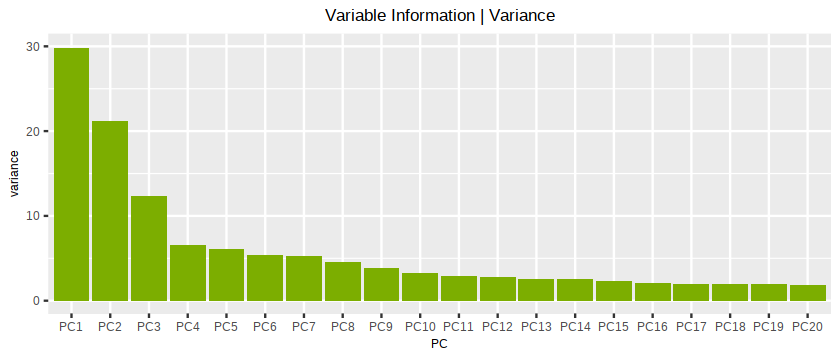

In [9]:
# Present a bar chart to visualize the variance of the first 20 principal components.
#
# You can use the var_info.var() function.

pc.var = data.frame(variance=var_info.var(pc.x[, 1:20]), variable=colnames(pc.x[,1:20]))

ggplot(pc.var) + ggtitle("Variable Information | Variance") + xlab("PC") + ylim(0, 30) + 
geom_col(aes(x=reorder(variable, -variance), y=variance))


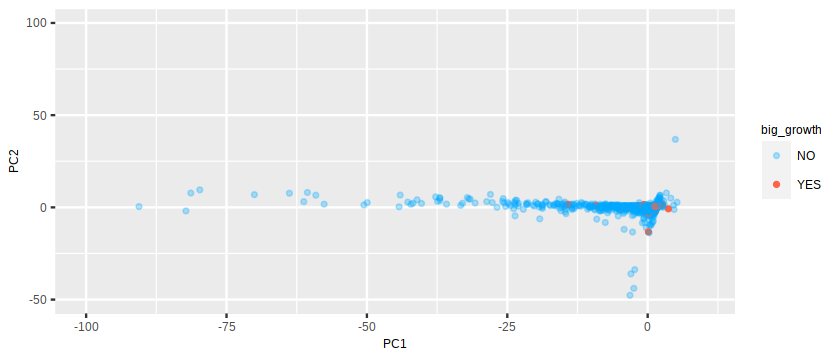

In [10]:
# Present a 2D scatterplot to visualize PC1 vs PC2 vs big_growth
# (for -100≤PC1≤10 on horizontal axis, -50≤PC2≤100 on vertical axis, and big_growth color-coded).

new.data = data.frame(PC1=pc.x[,'PC1'], PC2=pc.x[, 'PC2'], big_growth=data[,'big_growth'])

ggplot(new.data) + ylim(-50, 100) + xlim(-100, 10) + 
geom_point(aes(x=PC1, y=PC2, color=big_growth, alpha=big_growth), na.rm=TRUE) + 
scale_alpha_manual(values=c(0.3, 1.0)) + theme.legend_title

### Transform the Data

In [11]:
# Change the representation of the data:
#   The first 3 columns are gvkey, tic, and conm; these are predictor variables
#   The next 3 columns are PC1, PC2, and PC3; these are predictor variables
#   The next 3 columns are prccq, growth, and big_growth; these are outcome variables
# Keep the names of the predictor variables for later use.
#
# How many observations and variables?
# How many predictor variables?
# How many outcome variables? 
# Present the first few observations of the resulting dataset.

predictor = data.frame(data.imputed[,c('gvkey', 'tic', 'conm')], pc.x[, c('PC1', 'PC2', 'PC3')])
outcome = data[, c('prccq', 'growth', 'big_growth')]
transform.data = data.frame(predictor, outcome)
data.frame(observations = nrow(transform.data), variables = length(colnames(transform.data)))
data.frame(length.prevars. = length(colnames(predictor)), length.outvars. = length(colnames(outcome)))
head(transform.data, 6)

observations,variables
4305,9


length.prevars.,length.outvars.
6,3


gvkey,tic,conm,PC1,PC2,PC3,prccq,growth,big_growth
1004,AIR,AAR CORP,1.4097638,0.2124544,-0.18735809,43.69,0.0507455507,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,-2.8093139,0.2246363,1.43661206,32.11,-0.3828560446,NO
1050,CECE,CECO ENVIRONMENTAL CORP,1.5247216,0.4396434,-0.16785608,6.75,0.3157894737,YES
1062,ASA,ASA GOLD AND PRECIOUS METALS,1.5736687,0.6384403,0.01227541,8.66,-0.2164739518,NO
1072,AVX,AVX CORP,1.2812646,0.4529129,0.09293832,15.25,-0.1184971098,NO
1075,PNW,PINNACLE WEST CAPITAL CORP,0.3697622,-0.4860613,-0.01283639,85.20,0.0002347969,NO


### Store Transformed Data & Transformation Meta-Data 

In [12]:
# Store the transformed data (4305 observations, 8 variables)
write.csv(data, "My Data.csv", row.names=FALSE)

In [13]:
# Store the variable names of the filtered data (239 predictor variable names)
saveRDS(cn, "My Filter.rds")

In [14]:
# Store the imputation values (239 means and modes)
saveRDS(ml, "My Imputation.rds")

In [15]:
# Store the PCA centroids and weight matrix
saveRDS(pc, "My PC.rds")

In [16]:
# Store the predictor variable names of the transformed data (6 predictor variable names)
saveRDS(prevars, "My Predictors.rds")

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised December 28, 2020
</span>
</p>
</font>